<a href="https://colab.research.google.com/github/Haila-Abdullah/Salary_Prediction_Regression_Models./blob/main/Salary_Prediction_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis?
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?




## Import the required libraries


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [28]:
# Load the dataset
df = pd.read_csv('/content/Salary_dataset.csv')

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data



The dataset used in this analysis contains two columns of interest: 'YearsExperience' and 'Salary'. The dataset aims to explore the relationship between an individual's years of experience and their corresponding salary. Here is a brief description of the dataset's attributes:

- **YearsExperience**: The number of years of experience a person has in a particular field.

- **Salary**: The corresponding salary of the individual based on their years of experience.

In [29]:
# Show the first few rows to get a quick overview
print(df.head())  # Displays the first five rows

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [30]:
# Get information about the dataset, including the data types and any missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
None


In [31]:
# Statistical summary of the dataset (mean, std, min, max, etc.)
print(df.describe())

       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.500000         4.800000   65238.000000
75%     21.750000         7.800000  100545.750000
max     29.000000        10.600000  122392.000000


In [32]:
# Drop the unnecessary column 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])

In [33]:
# Check for missing values
print(df.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


# 2. Objectives



The main goal of this analysis is to predict an individual's **salary** based on their **years of experience** using different regression models. Specifically, we will explore three types of regression models:

1- **Simple Linear Regression**: Used as a baseline to predict salary using only years of experience.

2- **Polynomial Regression**: A more flexible model that adds polynomial features to capture non-linear relationships.

3- **Regularized Regression (Ridge and Lasso)**: These models use regularization to control overfitting and improve prediction accuracy.

We will compare these models in terms of accuracy and interpretability, using metrics like **R-squared and Mean Squared Error**.



# 3. Linear Regression Models


We will train three different regression models:

- **Simple Linear Regression**: This model uses a single feature (YearsExperience) to predict Salary.

- **Polynomial Regression**: We will create polynomial features to capture non-linear relationships.

- **Regularized Linear Regression (Ridge and Lasso)**: These models incorporate regularization to prevent overfitting.


In [37]:
# Define the independent (X) and dependent (y) variables
X = df[['YearsExperience']]  # Independent variable (Years of Experience)
y = df['Salary']  # Dependent variable (Salary)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
lr = LinearRegression()
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=0.1)

# Train the models
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Calculate performance metrics for each model
print("\n------------------- Simple Linear Regression Metrics -------------------")
print('Mean Squared Error:', round(mean_squared_error(y_test, y_pred_lr), 2))
print('R2 Score:', round(r2_score(y_test, y_pred_lr), 3))

print("\n------------------- Ridge Regression Metrics -------------------")
print('Mean Squared Error:', round(mean_squared_error(y_test, y_pred_ridge), 2))
print('R2 Score:', round(r2_score(y_test, y_pred_ridge), 3))

print("\n------------------- Lasso Regression Metrics -------------------")
print('Mean Squared Error:', round(mean_squared_error(y_test, y_pred_lasso), 2))
print('R2 Score:', round(r2_score(y_test, y_pred_lasso), 3))

# Polynomial Regression
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Fit and predict using polynomial regression
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

# Evaluate polynomial regression
print("\n------------------- Polynomial Regression Metrics -------------------")
print('Mean Squared Error:', round(mean_squared_error(y_test, y_pred_poly), 2))
print('R2 Score:', round(r2_score(y_test, y_pred_poly), 3))



------------------- Simple Linear Regression Metrics -------------------
Mean Squared Error: 37784662.47
R2 Score: 0.941

------------------- Ridge Regression Metrics -------------------
Mean Squared Error: 38245807.92
R2 Score: 0.941

------------------- Lasso Regression Metrics -------------------
Mean Squared Error: 37784759.44
R2 Score: 0.941

------------------- Polynomial Regression Metrics -------------------
Mean Squared Error: 33481265.38
R2 Score: 0.948


Upon comparison, it is evident that **polynomial regression** provided the best performance based on both **MSE** and **R2 Score**, achieving the lowest **MSE** and the highest **R2 Score**, suggesting it is the most suitable model in this case."

# **Visualizations**

**Simple Linear Regression**

Plot the actual data points along with the linear regression line, showing the relationship between **Years of Experience** and **Salary**.

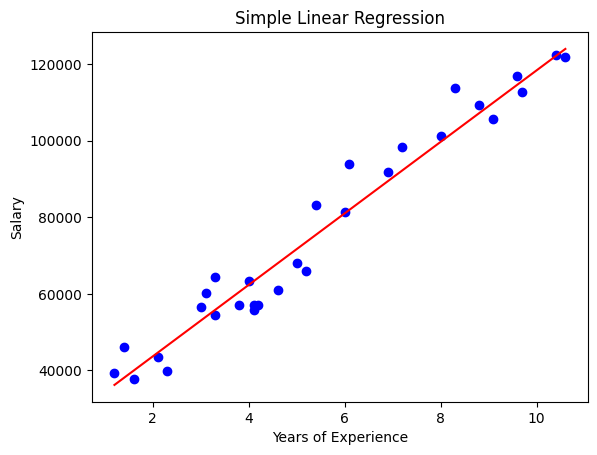

In [38]:
# Visualize the results
plt.scatter(X, y, color='blue')
plt.plot(X, lr.predict(X), color='red')
plt.title("Simple Linear Regression")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

**Polynomial Regression**

A similar plot but with the polynomial regression line showing the non-linear relationship.


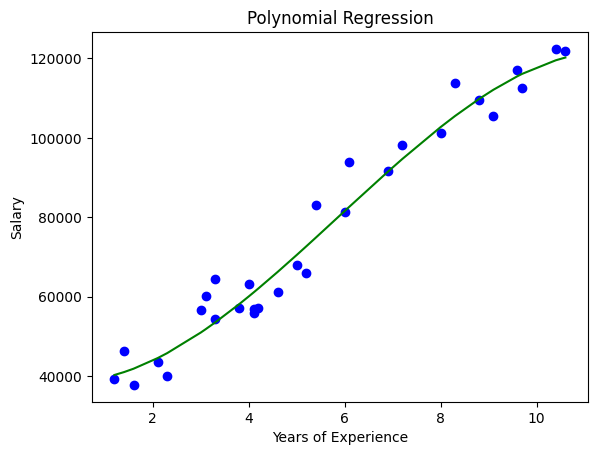

In [39]:
plt.scatter(X, y, color='blue')
plt.plot(X, poly_reg.predict(poly.fit_transform(X)), color='green')
plt.title("Polynomial Regression")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


# 4. Insights and key findings


Based on the regression models analyzed, we can summarize the following insights and key findings:

- **Simple Linear Regression**: The Simple Linear Regression model performed quite well, with an R2 score of 0.941. This indicates a high degree of correlation between the years of experience and salary. The Mean Squared Error (MSE) for this model was 37,784,662, showing that the model can predict salary fairly accurately based on years of experience alone.

- **Ridge Regression**: Ridge Regression performed similarly to Simple Linear Regression, with an R2 score of 0.941. However, the MSE was slightly higher at 38,245,808. The small increase in MSE is likely due to the regularization, which helps prevent overfitting. This model might be beneficial in cases with more complex datasets with multiple features.

- **Lasso Regression**: Lasso Regression showed results almost identical to Simple Linear Regression with an R2 score of 0.941 and an MSE of 37,784,759. Lasso also applies regularization to control overfitting, which could help if additional features were included in the model.

- **Polynomial Regression**: The Polynomial Regression model, which included cubic polynomial features, outperformed the linear models with an R2 score of 0.948 and an MSE of 33,481,265. The slight improvement in the R2 score and lower MSE indicate that the relationship between years of experience and salary is nonlinear, and the polynomial model is able to capture this better.

# 5. Next Steps


Although the current models have performed well, there are some next steps that could improve the accuracy and generalizability of the model:

- **Additional Data**: Collecting more data or including other features (such as industry, location, or education level) could help improve the model's accuracy and better capture salary variability.

- **Cross-Validation**: Implementing cross-validation would give a more robust measure of model performance by ensuring that the model is not overfitting to a particular train-test split.

- **Model Refinement**: Experimenting with other regression models such as Decision Trees or Random Forests could provide more accurate predictions, especially with non-linear relationships or larger datasets.

- **Hyperparameter Tuning**: Fine-tuning the hyperparameters, especially for the Ridge and Lasso models, can lead to better performance and help prevent underfitting or overfitting.

By following these next steps, we could potentially improve the model's predictive accuracy and generalizability to unseen data.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
